## Hardware Incident Analysis During Specific Time Windows (Flag 9)

### Dataset Description
The dataset comprises 600 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the hardware-related incidents during an identified time window to pinpoint potential hiccups that could be causing any anomalies.

**Role**: DT Asset Manager

**Difficulty**: 4 out of 5. This task involves complex data analysis to correlate the timing of incidents with potential internal changes or external events. Also deserves skills on performing linear regression.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell imports the dataset for our analysis, it is stored as a CSV file "flag-9.csv" and loads it into a DataFrame. The process involves reading the data from the specified file path and include checking the first few rows to confirm accurate loading.


In [2]:
dataset_path = "csvs/flag-9.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,number,closed_by,state,caller_id,category,assigned_to,opened_at,sys_updated_on,closed_at,short_description,assignment_group,priority
0,system,INC0000000000,Fred Luddy,Closed,Don Goodliffe,Inquiry / Help,Fred Luddy,2023-01-01 07:18:00,2023-01-05 01:35:49.503780519,2023-01-05 01:35:49.503780519,Need assistance with software installation,Service Desk,3 - Moderate
1,employee,INC0000000001,Howard Johnson,Resolved,Bud Richman,Inquiry / Help,Luke Wilson,2023-01-01 09:58:00,2023-01-03 03:10:44.591529724,2023-01-03 03:10:44.591529724,Need assistance with software installation,Service Desk,3 - Moderate
2,system,INC0000000002,Howard Johnson,Resolved,Don Goodliffe,Software,Fred Luddy,2023-01-01 21:04:00,2023-01-07 14:24:52.756697158,2023-01-07 14:24:52.756697158,Issue installing new software,Software,2 - High
3,admin,INC0000000003,Charlie Whitherspoon,Resolved,David Loo,Software,Fred Luddy,2023-01-02 05:51:00,2023-01-08 04:23:05.794022934,2023-01-08 04:23:05.794022934,Unable to install new update on system,Software,1 - Critical
4,employee,INC0000000004,Beth Anglin,Resolved,ITIL User,Database,Charlie Whitherspoon,2023-01-02 16:50:00,2023-01-10 04:54:42.985532167,2023-01-10 04:54:42.985532167,Unable to establish connection to MySQL server,Database,2 - High


### **Question 1**: What is the trend in the time to resolution (TTR) for incidents across categories over the timeline?

#### Plot Time to Resolution (TTR) over time for different categories
This cell creates line plot to visualize the trend in Time to Resolution (TTR) for incidents across different categories over time. By tracking how quickly incidents are resolved within each category it provides insights into efficiencies of incident handling and helps identify if certain categories consistently experience longer or shorter resolution times

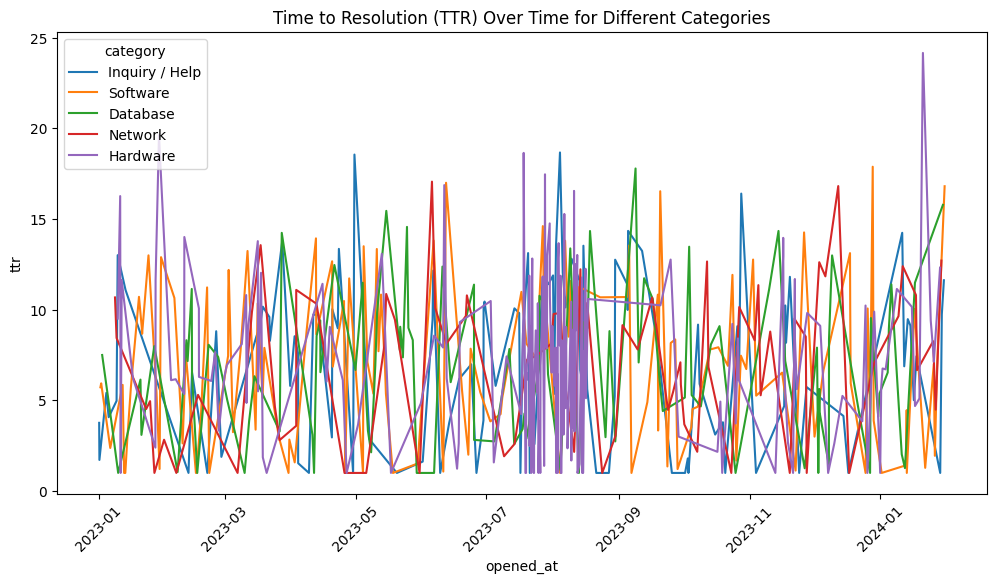

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Create a new column 'month_year' to make the plot more readable
# df['month_year'] = df['opened_at'].dt.to_period('M')
df["ttr"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400
# Convert 'ttr' column to numeric and handle errors
df["ttr"] = pd.to_numeric(df["ttr"], errors="coerce")

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="opened_at", y="ttr", hue="category")
plt.title("Time to Resolution (TTR) Over Time for Different Categories")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "Uniform trend of TTR for all category incidents, however there is a dense cluster of incidents in the Hardware category during the period 2023-08.",
    "insight_value": {"x_val": "Anomaly Periods", "y_val": "Increased TTR from 2023-07"},
    "plot": {
        "plot_type": "line",
        "title": "TTR over time for different categories of Incidents",
        "x_axis": {
            "name": "Time",
            "value": "Time periods",
            "description": "This represents the specific time  periods of interest."
        },
        "y_axis": {
            "name": "Time to Resolution",
            "value": "Dynamic based on data",
            "description": "This represents the time taken to resolve incidents, grouped across category during the  period."
        },
        "description": "The line graph demonstrates an uniform trend in the TTR for incidents across all categories. However, there is a dense cluster of incidents in the Hardware category during the period 2023-08. This period is characterized by dense TTR, indicating a potential anomaly in the resolution process for Hardware incidents. Addressing the root causes of increased TTR during these periods could enhance overall service efficiency "
    },
    "question": "What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?",
    "actionable_insight": "Addressing the root causes ofd sense TTR points during these periods could enhance overall service efficiency"
}

{'data_type': 'descriptive',
 'insight': 'Uniform trend of TTR for all category incidents, however there is a dense cluster of incidents in the Hardware category during the period 2023-08.',
 'insight_value': {'x_val': 'Anomaly Periods',
  'y_val': 'Increased TTR from 2023-07'},
 'plot': {'plot_type': 'line',
  'title': 'TTR over time for different categories of Incidents',
  'x_axis': {'name': 'Time',
   'value': 'Time periods',
   'description': 'This represents the specific time  periods of interest.'},
  'y_axis': {'name': 'Time to Resolution',
   'value': 'Dynamic based on data',
   'description': 'This represents the time taken to resolve incidents, grouped across category during the  period.'},
  'description': 'The line graph demonstrates an uniform trend in the TTR for incidents across all categories. However, there is a dense cluster of incidents in the Hardware category during the period 2023-08. This period is characterized by dense TTR, indicating a potential anomaly in th

### **Question 2: What is the overall distribution of incidents across categories?**

#### Plot overall number of incidents by each category
This cell creates a bar plot to visualize the overall distribution of incidents across different categories, providing insights into which categories see the most activity and might require additional resources or attention. 

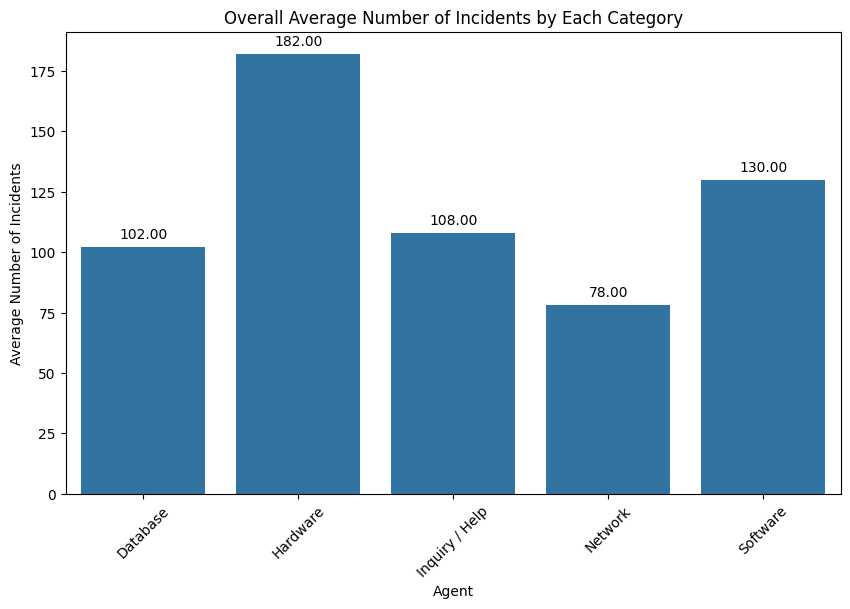

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('category').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents by Each Category')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{"data_type":"descriptive",
"insight": "hardware incidents are higher than others",
"insight_value":{"x_val": "Hardware", "y_val": 182},
"plot": {
    "plot_type": "histogram",
    "title": "Incidents by Category",
    "x_axis": {
        "name": "Category",
        "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "description": "This represents the different categories of incidents."
    },
    "y_axis": {
        "name": "Number of Incidents",
        "value": [182, 130, 78, 108, 102],
        "description": "This represents the number of incidents in each category."
    },
    "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."
},
"question": "What is the distribution of incidents across all categories?",
"actionable_insight": "With the Hardware category having the highest number of incidents, it could be beneficial to allocate more resources or provide additional training to the team handling this category to effectively manage and resolve these incidents."
}

{'data_type': 'descriptive',
 'insight': 'hardware incidents are higher than others',
 'insight_value': {'x_val': 'Hardware', 'y_val': 182},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [182, 130, 78, 108, 102],
   'description': 'This represents the number of incidents in each category.'},
  'description': "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."},
 'question': 'What is the distribution of incidents across all categories?',
 'Actionable Insight': 'With the Hardware c


### **Question 3**: How are incidents distributed across different categories over time?

#### Plot number of incidents created over time by category
This cell creates a count plot to visualize how incidents are distributed across different categories over time, providing insights into trends or any significant changes in the types of incidents reported. By tracking the distribution of incidents on monthly basis, the plot helps identify how demands change/evolve and which categories may require more attention at different times. 

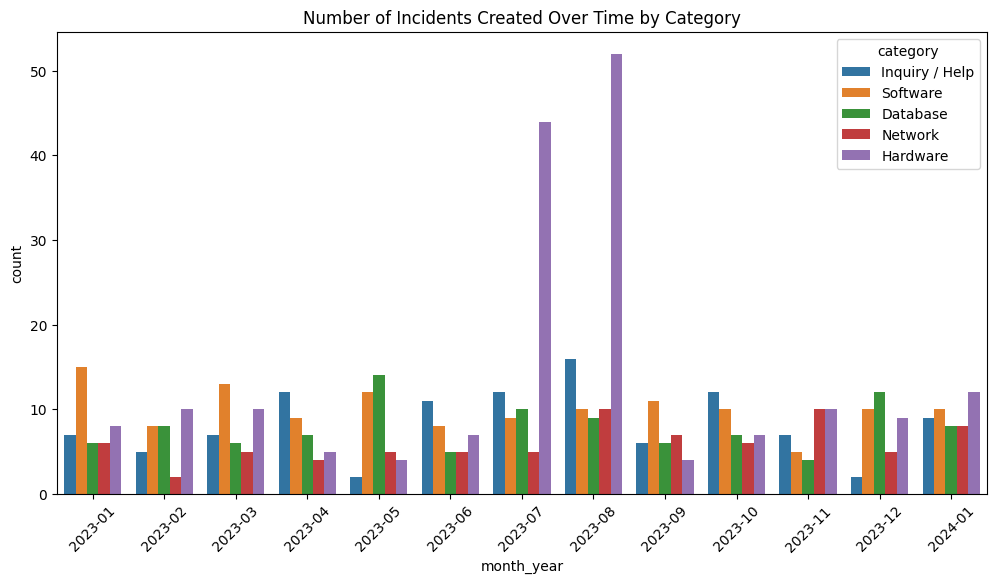

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [1]:
{
    "data_type": "descriptive",
    "insight": "Fluctuations observed in incident frequencies across categories, particularly high hardware incident count for two months",
    "insight_value": {"x_val": "Time", "y_val": "Incident Count"},
    "plot": {
        "plot_type": "line",
        "title": "Incident Distribution Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "2023-01-01 to 2024-02-01",
            "description": "This represents the timeline of the data collected."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Dynamic based on data",
            "description": "This represents the number of incidents occurring over time for each category."
        },
        "description": "The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the Hardware category. for periods between 2023-07 to 2023-08 the cases are 4 times more than the average. This could indicate a potential issue that needs to be addressed."
    },
    "question": "How are incidents distributed across different categories over time?",
    "actionable_insight": "Identifying specific times with high incident rates can help in preemptive resource allocation and readiness for handling spikes."
}

{'data_type': 'descriptive',
 'insight': 'Fluctuations observed in incident frequencies across categories, particularly high hardware incident count for two months',
 'insight_value': {'x_val': 'Time', 'y_val': 'Incident Count'},
 'plot': {'plot_type': 'line',
  'title': 'Incident Distribution Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': '2023-01-01 to 2024-02-01',
   'description': 'This represents the timeline of the data collected.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Dynamic based on data',
   'description': 'This represents the number of incidents occurring over time for each category.'},
  'description': 'The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the Hardware category. for periods between 2023-07 to 2023-08 the cases are 4 times more than the average. This could indicate a potential issue that needs to be addressed.'},
 'question': 'Ho

 ### **Question 4**: During which periods do we observe spikes in incident reports, particularly in the Hardware category?

#### Plot number of "Hardware" incidents over time.

This cell creates a bar plot to visualize the number of incidents reported in the Hardware category over time, providing insights into when spikes in incident reports occur precisely. Focusing on the Hardware category, this helps identify specific periods with unusually high activity.


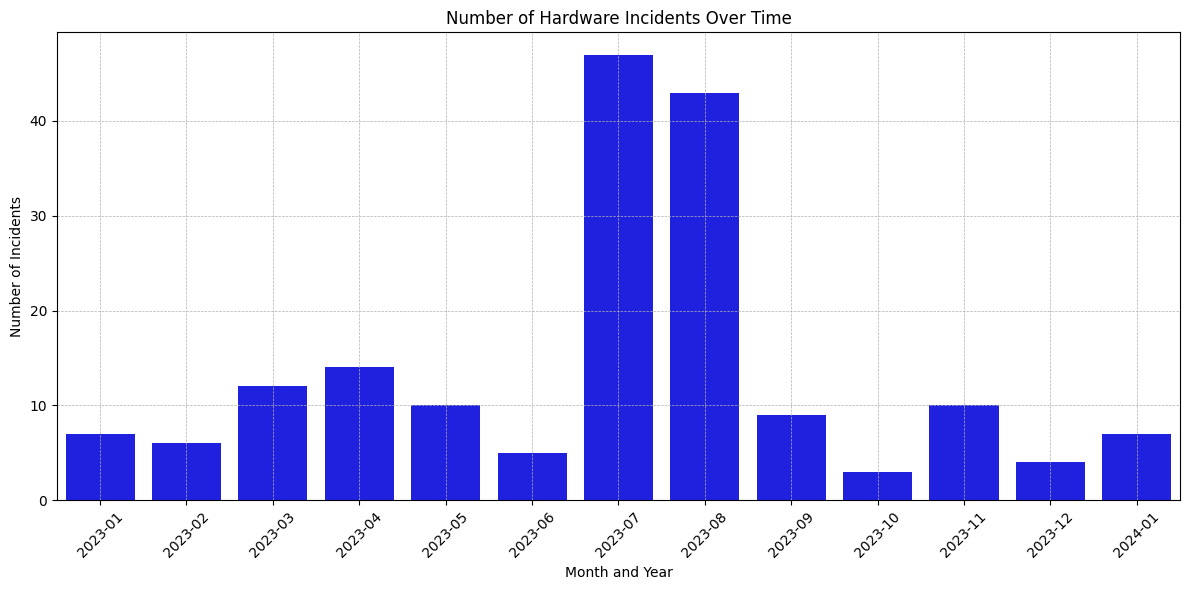

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded and sorted by 'opened_at' as in the previous code

# Filter the DataFrame to include only Hardware incidents
hardware_df = df[df['category'] == 'Hardware']

# Create a new DataFrame grouping by 'month_year' to count incidents in each period
hardware_counts = hardware_df.groupby('month_year').size().reset_index(name='counts')

# Create a bar plot to visualize the number of Hardware incidents over time
plt.figure(figsize=(12, 6))
sns.barplot(data=hardware_counts, x='month_year', y='counts', color='blue')
plt.title("Number of Hardware Incidents Over Time")
plt.xlabel("Month and Year")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "descriptive",
    "insight": "Specific time windows with elevated Hardware incidents identified",
    "insight_value": {"x_val": "Time Window between 2023-07 and 2023-08", "y_val": "more than 40 incidents per month"},
    "plot": {
        "plot_type": "bar",
        "title": "Spikes in Hardware Incidents Over Time",
        "x_axis": {
            "name": "Time Window",
            "value": "Specific months",
            "description": "This represents specific time windows identified with high incident rates."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Dynamic based on data",
            "description": "This represents the count of Hardware incidents in each identified time window."
        },
        "description": "The bar graph identifies specific periods where Hardware incidents spike significantly, warranting further investigation. average is 6 incidents per month, but in 2023-06 to 2023-08 the cases are averaged 40 per month significantly more than the average."
    },
    "question": "During which periods do we observe spikes in incident reports, particularly in the Hardware category?",
    "actionable_insight": "Focusing on these high-activity periods can guide targeted troubleshooting and preventive measures."
}

{'data_type': 'descriptive',
 'insight': 'Specific time windows with elevated Hardware incidents identified',
 'insight_value': {'x_val': 'Time Window', 'y_val': 'High Incident Count'},
 'plot': {'plot_type': 'bar',
  'title': 'Spikes in Hardware Incidents Over Time',
  'x_axis': {'name': 'Time Window',
   'value': 'Specific months',
   'description': 'This represents specific time windows identified with high incident rates.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Dynamic based on data',
   'description': 'This represents the count of Hardware incidents in each identified time window.'},
  'description': 'The bar graph identifies specific periods where Hardware incidents spike significantly, warranting further investigation.'},
 'question': 'During which periods do we observe spikes in incident reports, particularly in the Hardware category?',
 'Actionable Insight': 'Focusing on these high-activity periods can guide targeted troubleshooting and preventive measures.

### **Question 5**: Could we forecast these high-activity periods in the future?

#### Plot projected trends in Hardware incidents.

This cell uses linear regression to predict future trends in the number of hardware incidents based on historical data, providing insights into potential future high-activity periods. By modeling and projecting these trends, the plot helps anticipate when spikes in hardware incidents might occur

/tmp/ipykernel_38186/153798481.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=incident_counts['opened_at'].max().to_timestamp(), periods=12, freq='M')  # Predicting for the next 10 years, monthly


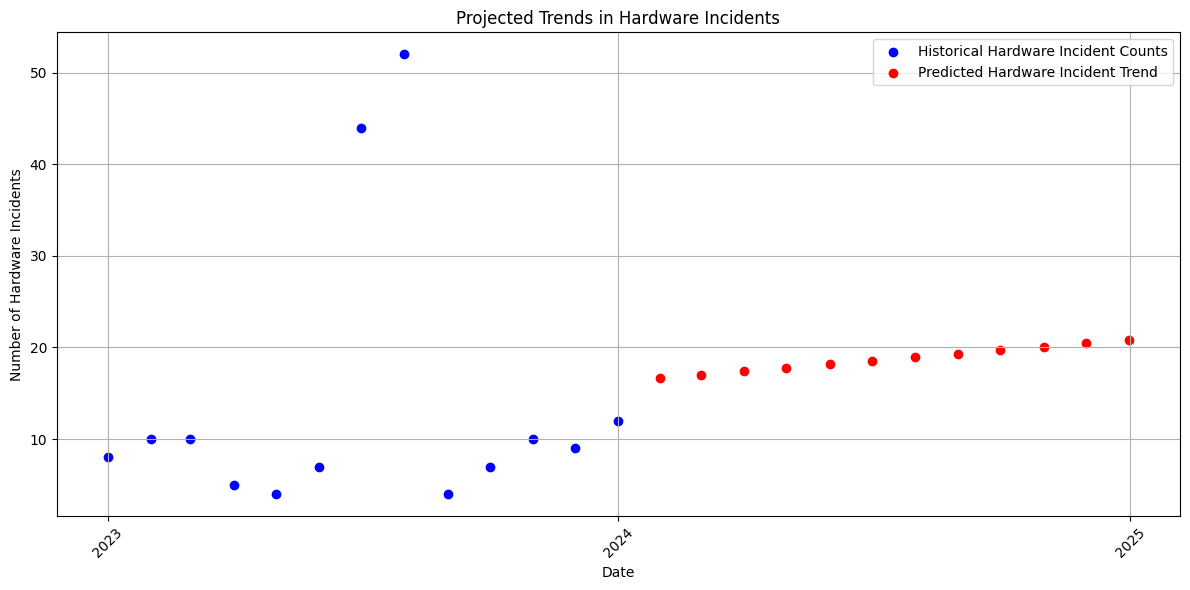

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-9.csv"
# Load the dataset
df = pd.read_csv(dataset_path)
df = df[df['category'] == 'Hardware']
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Count the number of hardware incidents per month
incident_counts = df.groupby(df['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_dates = pd.date_range(start=incident_counts['opened_at'].max().to_timestamp(), periods=12, freq='M')  # Predicting for the next 10 years, monthly
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Hardware Incident Counts')
plt.scatter(future_dates, future_preds, color='red', label='Predicted Hardware Incident Trend')
plt.title('Projected Trends in Hardware Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Hardware Incidents')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [17]:
{
    "data_type": "predictive",
    "insight": "Continued trend of increasing hardware incidents could signify recurring hardware issues or outages",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Potential for more frequent and severe hardware-related disruptions"
    },
    "description": "The predictive analysis using a linear regression model on historical hardware incident data indicates a continued linear increase in the number of such incidents over time. If this trend is not adequately addressed, it could lead to more frequent and potentially severe hardware-related disruptions in the future. This escalation could adversely affect system reliability, lead to increased downtime, and potentially result in significant operational and financial costs for the organization.",
    "recommendation": {
        "action": "Implement proactive hardware maintenance and upgrade strategies",
        "expected_outcome": "Reduction in hardware-related incidents and improved system reliability",
        "urgency": "High"
    },
    "actionable_insight": "To mitigate the risks associated with the predicted increase in hardware incidents, it is crucial to adopt a proactive approach towards hardware maintenance and management. This includes regular reviews and upgrades of existing hardware systems, implementing robust monitoring tools to detect and address potential issues before they escalate, and possibly investing in more resilient hardware solutions. Additionally, training staff to effectively manage and troubleshoot hardware issues can further help in reducing the frequency and impact of such incidents. Establishing these preventive measures will not only enhance system reliability but also protect the organization from unexpected downtimes and associated costs."
}

{'data_type': 'predictive',
 'insight': 'Continued trend of increasing hardware incidents could signify recurring hardware issues or outages',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Potential for more frequent and severe hardware-related disruptions'},
 'description': 'The predictive analysis using a linear regression model on historical hardware incident data indicates a continued linear increase in the number of such incidents over time. If this trend is not adequately addressed, it could lead to more frequent and potentially severe hardware-related disruptions in the future. This escalation could adversely affect system reliability, lead to increased downtime, and potentially result in significant operational and financial costs for the organization.',
 'recommendation': {'action': 'Implement proactive hardware maintenance and upgrade strategies',
  'expected_outcome': 'Reduction in hardware-related incidents and improved system reliability',
  'urgency': 'H

### Summary of Findings (Flag 9)

1. **Elevated Frequency of Incidents**: There is a noted anomaly in the frequency of incidents during a specific time window, particularly in the Hardware category. This suggests a potential surge in issues related to hardware components.
2. **Occurance and Possible Causes**: The elevated frequency occurs particualy from 2023-07 to 2023-08. This could be linked to various factors such as new hardware deployments or changes in usage patterns. 
3. **Need for Detailed Investigation**: To address and mitigate the anomaly effectively, a thorough investigation into the specific causes of the increased frequency of hardware incidents is essential.